<a href="https://colab.research.google.com/github/jaw039/Google-Colab-Notebooks/blob/main/CSE151_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

Matplotlib is building the font cache; this may take a moment.


# Data Exploration

In [3]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])

In [4]:
display(x.shape)
display(w.shape)
display(y.shape)

(4, 1)

(1, 1)

(4, 1)

In [5]:
display(x)
display(w)
display(bias)
display(y)

array([[1],
       [0],
       [1],
       [0]])

array([[1.2]])

0.5

array([[0],
       [1],
       [0],
       [1]])

In [6]:
yhat = x@w+bias
yhat

array([[1.7],
       [0.5],
       [1.7],
       [0.5]])

In [8]:
## check our shape first
yhat.shape

(4, 1)

In [ ]:
## element wise operation
yhat - y

array([[ 1.7],
       [-0.5],
       [ 1.7],
       [-0.5]])

In [10]:
## RSS
(yhat - y)**2  

array([[2.89],
       [0.25],
       [2.89],
       [0.25]])

In [11]:
## make it a scalar value with np.sum()
np.sum((yhat - y)**2)

np.float64(6.279999999999999)

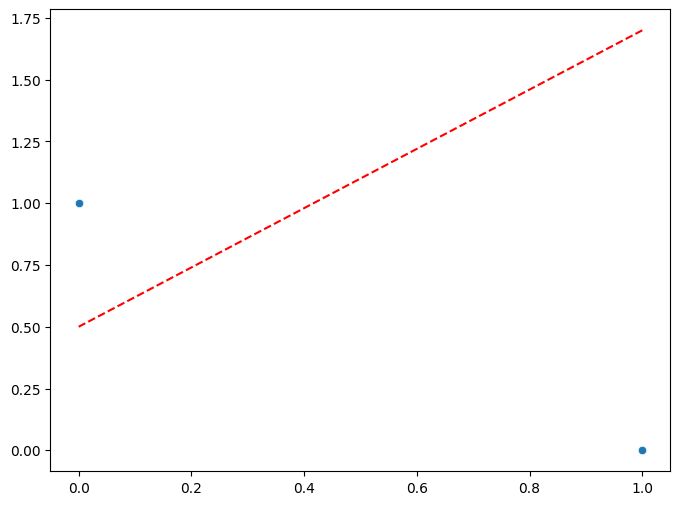

In [7]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot([x[0], x[-1]], [yhat[0], yhat[-1]], color='red',markerfacecolor='red',
             markersize=10,linestyle='dashed')

# Gradient Descent Code

In [ ]:
def mse_loss_fxn(x, w, bias, y):
  yhat = x@w+bias
  if yhat.shape != y.shape:
    print('shape mismatch!')
  else:
    mse = np.sum((x @ w + bias - y)**2)/y.shape[0]
  return mse

In [ ]:
def bias_derivative(x, w, bias, y):
  myderivative = np.sum(x @ w + bias - y)/y.shape[0] # x is a vector, w is a scalar and y is a vector
  return myderivative

In [ ]:
def dependent_var_derivative(x, w, bias, y):
  if x.shape[1] == 1:
    if len(w.shape) != 2:
      w = w.reshape(-1,1)
    myderivative = np.sum(x.T @ (x @ w + bias - y))/y.shape[0] # x is a vector, w is a scalar and y is a vector
    return myderivative
  else:
    print('x should be a vector of shape m,1 but found',x.shape)

In [ ]:
def gradient_descent_update_dep_var(x, w, bias, y, alpha):
  if len(w.shape) != 2:
      w = w.reshape(-1,1)
  w = w - alpha * (dependent_var_derivative(x, w, bias, y))
  return w
def gradient_descent_update_bias(x, w, bias, y, alpha):
  bias = bias - alpha * (bias_derivative(x, w, bias, y))
  return bias

# Testing our code

In [ ]:
display(x)
display(w)
display(bias)
display(y)

## 1st iteration

In [ ]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

In [ ]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)

In [ ]:
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

In [ ]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

## 2nd iter

In [ ]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)

In [ ]:
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

In [ ]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

## 3rd iter

In [ ]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

In [ ]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

## 4th iter

In [ ]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

In [ ]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

## Let's loop it!

In [ ]:
for i in range(0, 20):
  w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
  print('new bias =', bias)
  print('new MSE =', mse_loss_fxn(x, w, bias, y))
  print()

In [ ]:
display(y)
yhat = x@w+bias
yhat

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot([x[0], x[-1]], [yhat[0], yhat[-1]], color='red',markerfacecolor='red',
             markersize=10,linestyle='dashed')

## Participation block

# Reinitialize, loop and plot

In [ ]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.001

In [ ]:
for i in range(0, 20):
  w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, mylr)
  print('new bias =', bias)
  print('new MSE =', mse_loss_fxn(x, w, bias, y))
  print()

In [ ]:
display(y)
yhat = x@w+bias
yhat

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

## Let's change our alpha

In [ ]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
#w = np.array([[-0.62]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.01
iterations = 100

In [ ]:
display(y)
yhat = x@w+bias
yhat

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

# Learning time!

In [ ]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
#w = np.array([[-0.62]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.01
iterations = 100

weights = list()
cost = list()
biases  = list()
my_mse = mse_loss_fxn(x, w, bias, y)
print('Starting MSE =', my_mse)
cost.append(my_mse)
weights.append(w[0][0])
biases.append(bias)
for i in range(0, iterations):
  w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
  weights.append(w[0][0])
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, mylr)
  biases.append(bias)
  print('new bias =', bias)
  my_mse = mse_loss_fxn(x, w, bias, y)
  cost.append(my_mse)
  print('new MSE =', my_mse)
  print()

In [ ]:
g = sns.scatterplot(y = cost, x = weights)
g.invert_xaxis()

In [ ]:
yhat = x@w+bias
display(yhat)
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

In [ ]:
cost

In [ ]:
weights

In [ ]:
biases

# New dataset!

In [ ]:
# Dataset
x = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
              55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
              45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
              48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape(-1, 1)

y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
              78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
              55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
              60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]).reshape(-1, 1)

# Initialize parameters
w = np.random.randn(1, 1)
bias = np.random.randn()

# Hyperparameters
mylr = 0.01
iterations = 1000

In [ ]:
# plot me
sns.scatterplot(x=x.squeeze(), y=y.squeeze())

In [ ]:
weights = list()
cost = list()
biases  = list()
my_mse = mse_loss_fxn(x, w, bias, y)
print('Starting MSE =', my_mse)
cost.append(my_mse)
weights.append(w[0][0])
biases.append(bias)
for i in range(0, iterations):
  for j in range(0, 5):
    w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
    #print('new w =', w)
    bias = gradient_descent_update_bias(x, w, bias, y, mylr)
    #print('new bias =', bias)
    print('new MSE =', mse_loss_fxn(x, w, bias, y))
    #print()
  yhat = x@w+bias
  clear_output(wait=True)
  plt.figure()
  sns.scatterplot(x=x.squeeze(), y=y.squeeze())
  plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead
  plt.show()

## Let's do it again

In [ ]:
# Dataset
x = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
              55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
              45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
              48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape(-1, 1)

y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
              78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
              55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
              60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]).reshape(-1, 1)

# Initialize parameters
w = np.random.randn(1, 1)
b = np.random.randn()

# Hyperparameters
learning_rate = 0.001
num_iterations = 1000

## Participation block